In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/database_project/chinook.db')
cursor = conn.cursor()

In [ ]:
# get a list of tables in the database
tables = []
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table'"):
    tables.append(row[0])

# print the list of tables
print(tables)

['albums', 'sqlite_sequence', 'artists', 'customers', 'employees', 'genres', 'invoices', 'invoice_items', 'media_types', 'playlists', 'playlist_track', 'tracks', 'sqlite_stat1']


In [ ]:
query = "SELECT e.EmployeeId, e.FirstName, e.LastName, sales_by_rep.Total_sales_by_Sales_rep as Overall_Sales FROM (SELECT Sales_rep_ID, sum(Total_sales) as Total_sales_by_Sales_Rep FROM (SELECT CS.CustomerId, CS.Total_sales, C.SupportRepId as Sales_rep_ID FROM Customer_sales as CS INNER JOIN customers as C ON C.CustomerId = CS.CustomerId) GROUP BY Sales_rep_ID) as sales_by_rep INNER JOIN employees as e ON sales_by_rep.Sales_rep_ID = e.EmployeeId ORDER BY Total_sales_by_Sales_Rep DESC"

In [ ]:
data = pd.DataFrame(cursor.execute(query))
data['Employee ID'] = data[0]
data['First Name'] = data[1]
data['Last Name'] = data[2]
data['Total Sales'] = data[3]
data = data[['Employee ID', 'First Name', 'Last Name', 'Total Sales']]
data

,Employee ID,First Name,Last Name,Total Sales
0,3,Jane,Peacock,833.04
1,4,Margaret,Park,775.40
2,5,Steve,Johnson,720.16


In [11]:
df = pd.read_sql('select * from invoices', conn)
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [16]:
print(df.dtypes)

InvoiceId              int64
CustomerId             int64
InvoiceDate           object
BillingAddress        object
BillingCity           object
BillingState          object
BillingCountry        object
BillingPostalCode     object
Total                float64
dtype: object


In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [18]:
print(df.dtypes)

InvoiceId                     int64
CustomerId                    int64
InvoiceDate          datetime64[ns]
BillingAddress               object
BillingCity                  object
BillingState                 object
BillingCountry               object
BillingPostalCode            object
Total                       float64
dtype: object


In [19]:
df['Long_date'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%A, %B %d, %Y')
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Long_date
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,"Thursday, January 01, 2009"
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,"Friday, January 02, 2009"
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94,"Saturday, January 03, 2009"
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91,"Tuesday, January 06, 2009"
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86,"Sunday, January 11, 2009"


In [23]:
df['Day'] = pd.to_datetime(df['Long_date']).dt.strftime('%A')
df['Month'] = pd.to_datetime(df['Long_date']).dt.strftime('%B')
df['Year'] = pd.to_datetime(df['Long_date']).dt.strftime('%Y')
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Long_date,Day,Month,Year
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,"Thursday, January 01, 2009",Thursday,January,2009
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,"Friday, January 02, 2009",Friday,January,2009
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94,"Saturday, January 03, 2009",Saturday,January,2009
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91,"Tuesday, January 06, 2009",Tuesday,January,2009
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86,"Sunday, January 11, 2009",Sunday,January,2009


In [25]:
def convert_day_to_num (day: str):
  if day == 'Sunday':
    return 1
  elif day == 'Monday':
    return 2
  elif day == 'Tuesday':
    return 3
  elif day == 'Wednesday':
    return 4
  elif day == 'Thursday':
    return 5
  elif day == 'Friday':
    return 6
  else:
    return 7
  

convert_day_to_num("Friday")

6

In [26]:
def month_to_number(month_name: str):
    """
    Convert a month name to its corresponding month number.
    
    Parameters:
    month_name (str): The name of the month in English.
    
    Returns:
    int: The corresponding month number (1-12).
    """
    month_dict = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }
    return month_dict[month_name]

month_to_number('January')

1

In [29]:
df['Day_num'] = df['Day'].apply(convert_day_to_num)
df['Month_num'] = df['Month'].apply(month_to_number)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Long_date,Day,Month,Year,Day_num,Month_num
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,"Thursday, January 01, 2009",Thursday,January,2009,5,1
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,"Friday, January 02, 2009",Friday,January,2009,6,1
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94,"Saturday, January 03, 2009",Saturday,January,2009,7,1
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91,"Tuesday, January 06, 2009",Tuesday,January,2009,3,1
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86,"Sunday, January 11, 2009",Sunday,January,2009,1,1


In [30]:
df_4_hist = df[['InvoiceId', 'CustomerId', 'InvoiceDate', 'Day_num', 'Month_num', 'Year']]
df_4_hist.head()

,InvoiceId,CustomerId,InvoiceDate,Day_num,Month_num,Year
0,1,2,2009-01-01,5,1,2009
1,2,4,2009-01-02,6,1,2009
2,3,8,2009-01-03,7,1,2009
3,4,14,2009-01-06,3,1,2009
4,5,23,2009-01-11,1,1,2009


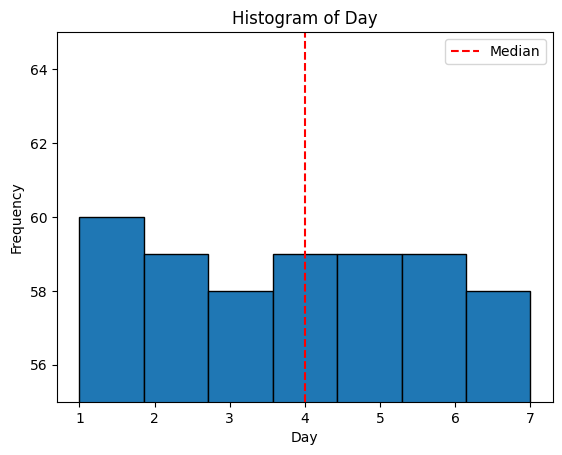

In [39]:
# Plot a histogram of the day column
plt.hist(df['Day_num'], bins=7, edgecolor='black')

# Add labels and scale
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Histogram of Day')
plt.ylim(55, 65)

# Calculate and add median
median = df['Day_num'].median()
plt.axvline(median, color='r', linestyle='--', label='Median')

# Show the plot
plt.legend()
plt.show()

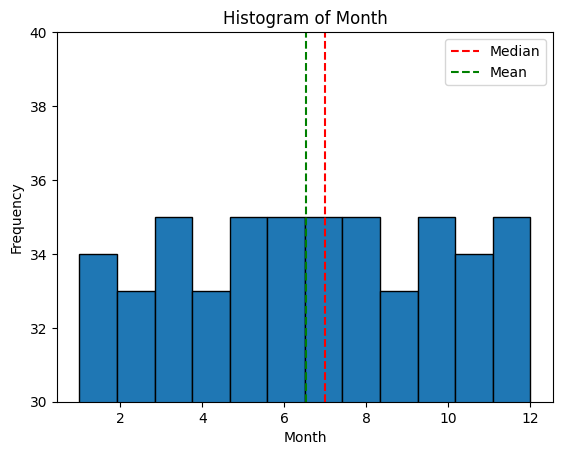

In [40]:
# Plot a histogram of the day column
plt.hist(df['Month_num'], bins=12, edgecolor='black')

# Add labels and scale
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.ylim(30, 40)

# Calculate and add median
median = df['Month_num'].median()
mean = df['Month_num'].mean()
plt.axvline(median, color='r', linestyle='--', label= 'Median')
plt.axvline(mean, color='g', linestyle='--', label='Mean')

# Show the plot
plt.legend()
plt.show()

In [42]:
const_query = '''SELECT G.Name, count(I.InvoiceId) as Total_sold
FROM invoice_items I
INNER JOIN tracks T
ON I.TrackId = T.TrackId
INNER JOIN genres G
ON T.GenreId = G.GenreId
GROUP BY G.Name'''


In [45]:
# execute the query and retrieve the result
result = conn.execute(const_query).fetchone()

# print the result
print("Initial value of average query response time:", result[1], 'sec')

Initial value of average query response time: 14 sec


In [46]:
new_query = '''SELECT * FROM (
SELECT c.FirstName, c.LastName, c.Address, c.Phone, c.Email, Csales.Total_sales as Total_Amount, Csales.my_rank as Rank_
FROM
(SELECT
		DENSE_RANK() OVER (
				ORDER BY Total_sales DESC
		) my_rank, 
		*
FROM 
		Customer_sales
) AS Csales
INNER JOIN customers c
ON Csales.CustomerId = c.CustomerId
)
WHERE Rank_ = 2
OR Rank_ = 3
OR Rank_ = 5
OR Rank_ = 8
OR Rank_ = 12'''

In [47]:
customers_rank = pd.read_sql(new_query, conn)
customers_rank

,FirstName,LastName,Address,Phone,Email,Total_Amount,Rank_
0,Richard,Cunningham,2211 W Berry Street,+1 (817) 924-7272,ricunningham@hotmail.com,47.62,2
1,Luis,Rojas,"Calle Lira, 198",+56 (0)2 635 4444,luisrojas@yahoo.cl,46.62,3
2,Julia,Barnett,302 S 700 E,+1 (801) 531-7272,jubarnett@gmail.com,43.62,5
3,Terhi,Hämäläinen,Porthaninkatu 9,+358 09 870 2000,terhi.hamalainen@apple.fi,41.62,8
4,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",+55 (12) 3923-5555,luisg@embraer.com.br,39.62,12
5,François,Tremblay,1498 rue Bélanger,+1 (514) 721-4711,ftremblay@gmail.com,39.62,12
6,Bjørn,Hansen,Ullevålsveien 14,+47 22 44 22 22,bjorn.hansen@yahoo.no,39.62,12
7,Dan,Miller,541 Del Medio Avenue,+1 (650) 644-3358,dmiller@comcast.com,39.62,12
8,Heather,Leacock,120 S Orange Ave,+1 (407) 999-7788,hleacock@gmail.com,39.62,12
9,Wyatt,Girard,"9, Place Louis Barthou",+33 05 56 96 96 96,wyatt.girard@yahoo.fr,39.62,12
